# King County - Housing Price Prediciton 

It is a practics problem, let us try to put our learnings to effect and see how we fare

### References

https://www.kaggle.com/madislemsalu/predicting-housing-prices-in-king-county-usa

### Import libraries and Dataset

In [943]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [944]:
url = 'https://raw.githubusercontent.com/dphi-official/Datasets/master/kc_house_data/kc_house_data.csv'
house_data = pd.read_csv(url)

data = house_data.copy()
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [945]:
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.661300e+04,16613.000000,16613.000000,16613.000000,1.661300e+04,16613.000000,16613.000000,16613.000000,16613.000000,16613.000000,16613.000000,16613.000000,16613.000000,16613.000000,16613.000000,16613.000000,16613.000000,16613.000000,16613.000000
mean,5.335161e+05,3.365918,2.062090,2053.860531,1.573761e+04,1.432553,0.007946,0.244026,3.449708,7.592608,1750.210859,303.649672,1967.297418,89.855234,98078.162283,47.560026,-122.215380,1974.793776,13287.334256
std,3.665165e+05,0.937185,0.758786,904.438391,4.195449e+04,0.509669,0.088786,0.781695,0.666582,1.168420,804.771068,450.701536,27.936716,413.846846,54.152178,0.139708,0.138657,673.022438,27456.421787
min,7.500000e+04,0.000000,0.000000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,660.000000
25%,3.150000e+05,3.000000,1.500000,1414.000000,5.454000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1180.000000,0.000000,1950.000000,0.000000,98033.000000,47.464600,-122.327000,1490.000000,5421.000000
50%,4.470000e+05,3.000000,2.000000,1900.000000,7.902000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1530.000000,0.000000,1969.000000,0.000000,98065.000000,47.573000,-122.231000,1830.000000,7823.000000
75%,6.387000e+05,4.000000,2.500000,2500.000000,1.107000e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2140.000000,600.000000,1990.000000,0.000000,98118.000000,47.679000,-122.127000,2330.000000,10327.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6110.000000,871200.000000


### Exploratory Data Analysis

There is no null values present in the dataset, but in columns like **yr_renovated, sqft_basement** there are numbers mxed with **0**, this could either mean there is no such feature for that house or it may be a missing value.

In [946]:
# data.info()
sns.set_context('poster')
sns.set(font_scale=1)

(array([1.0819e+04, 1.9850e+03, 2.0620e+03, 1.1320e+03, 4.1300e+02,
        1.2400e+02, 5.2000e+01, 1.2000e+01, 8.0000e+00, 1.0000e+00,
        3.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([   0.        ,  321.33333333,  642.66666667,  964.        ,
        1285.33333333, 1606.66666667, 1928.        , 2249.33333333,
        2570.66666667, 2892.        , 3213.33333333, 3534.66666667,
        3856.        , 4177.33333333, 4498.66666667, 4820.        ]),
 <a list of 15 Patch objects>)

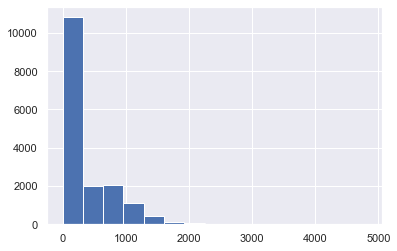

In [947]:
plt.hist(data.sqft_basement,bins=15)

In [948]:
data.sqft_basement.value_counts()

0       9960
500      189
700      185
800      177
600      171
        ... 
2040       1
1960       1
792        1
2590       1
1135       1
Name: sqft_basement, Length: 271, dtype: int64

In [949]:
sq_b = data.sqft_basement[(data['sqft_basement']==0)]
# print(len(sq_b))
len(sq_b)*100./len(data)

59.95304881719136

In [950]:
data.sqft_basement[(data['sqft_basement']>0)]=1

The reasone to do this is, **sqft_living is summation of living+basement squarefeet**. So if there is a basement, its sqft is already added in sqft_living. So we can convert this into a boolean kind of column

In [951]:
data.sqft_basement.unique()

array([0, 1])

It can be seen that in this case the value **0** represents there is no basement.Close to 60% of the houses do not have basement

(array([15865.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,   748.]),
 array([   0. ,  201.5,  403. ,  604.5,  806. , 1007.5, 1209. , 1410.5,
        1612. , 1813.5, 2015. ]),
 <a list of 10 Patch objects>)

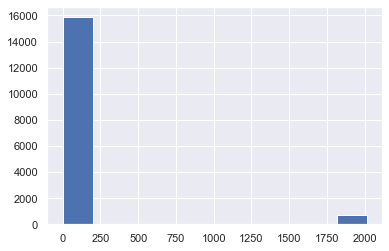

In [952]:
plt.hist(data.yr_renovated)

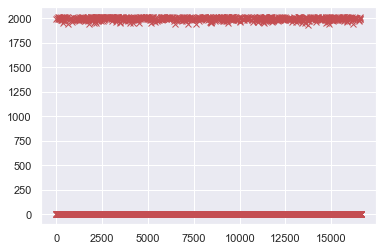

In [953]:
plt.plot(data.yr_renovated,'xr')

In [954]:
yr_ren = data.sqft_basement[(data['yr_renovated']==0)]
len(yr_ren)*100./len(data)

95.49750195629929

The **yr_renovated** column has almost 96% of values missing or 0. Looks like we may not be able to use this particular column for now. We can go ahead and drop this column from our data

In [955]:
data.drop('yr_renovated',axis=1,inplace=True)

In [956]:
data.price.describe()

count    1.661300e+04
mean     5.335161e+05
std      3.665165e+05
min      7.500000e+04
25%      3.150000e+05
50%      4.470000e+05
75%      6.387000e+05
max      7.700000e+06
Name: price, dtype: float64

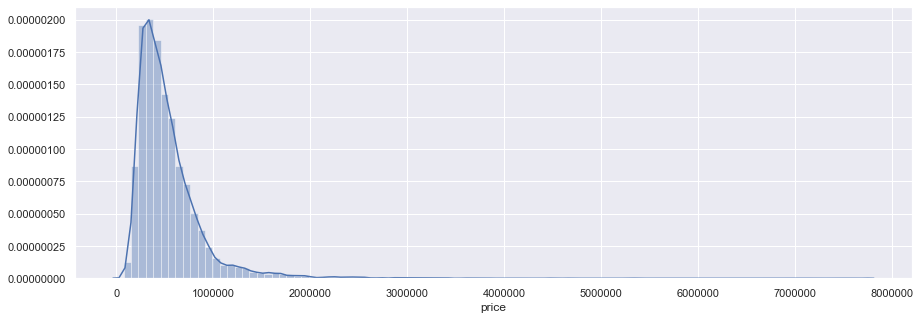

In [957]:
fig = plt.figure(figsize=(15,5))
sns.distplot(data.price,bins=100)

We can see the distribution of prices is normal, but heavily skewed to the right. This may be due to the outliers that exists way over the 75% quantile. 

In [958]:
data['price']=np.log(data['price'])

Lets log transform the features like, **price, sqft_living, sqft_above, sqft_lot**

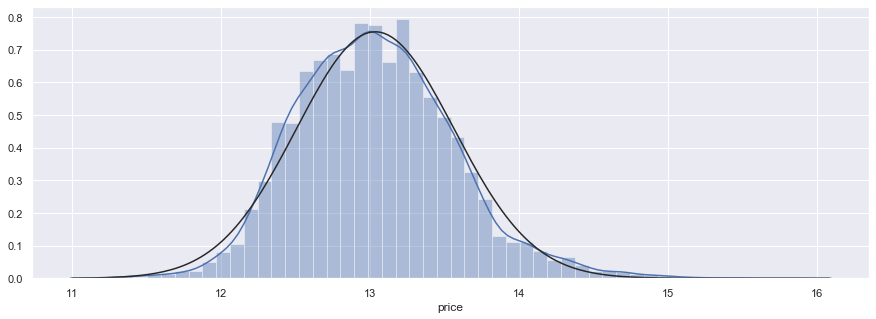

In [959]:
from scipy.stats import norm
fig = plt.figure(figsize=(15,5))
sns.distplot(data['price'],fit=norm)

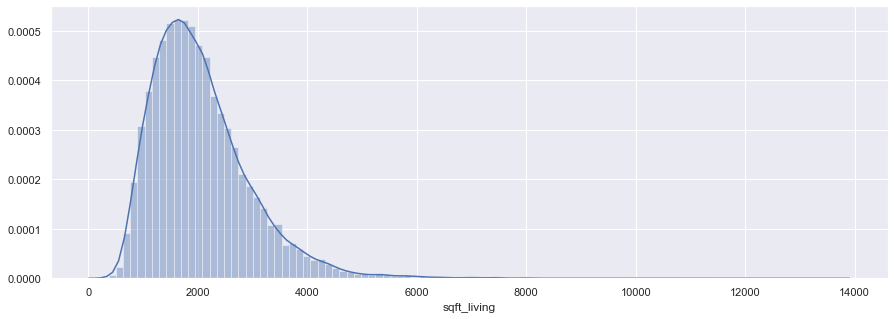

In [960]:
fig = plt.figure(figsize=(15,5))
sns.distplot(data.sqft_living,bins=100)

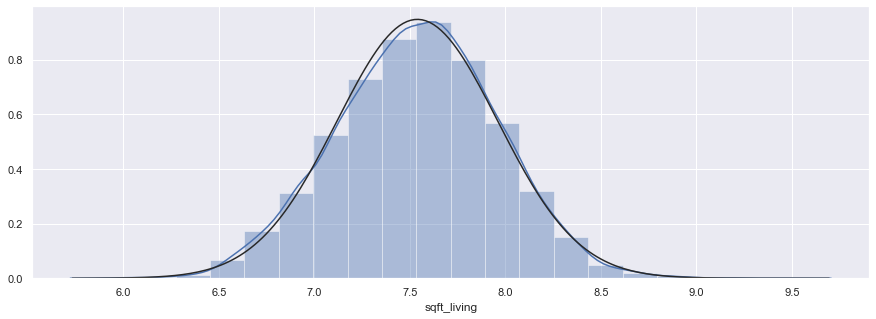

In [961]:
data['sqft_living'] = np.log(data['sqft_living'])
fig = plt.figure(figsize=(15,5))
sns.distplot(data.sqft_living,bins=20,fit=norm)

In [962]:
data.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'zipcode', 'lat', 'long', 'sqft_living15',
       'sqft_lot15'],
      dtype='object')

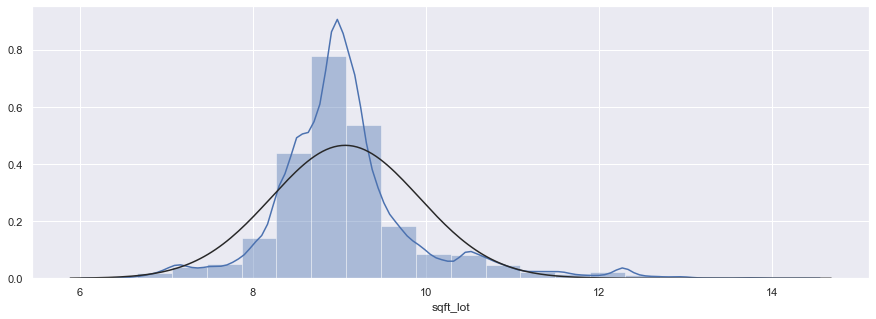

In [963]:
data['sqft_lot'] = np.log(data['sqft_lot'])
fig = plt.figure(figsize=(15,5))
sns.distplot(data.sqft_lot,bins=20,fit=norm)

In [964]:
data['sqft_above'] = np.log(data['sqft_above'])
data['sqft_living15'] = np.log(data['sqft_living15'])

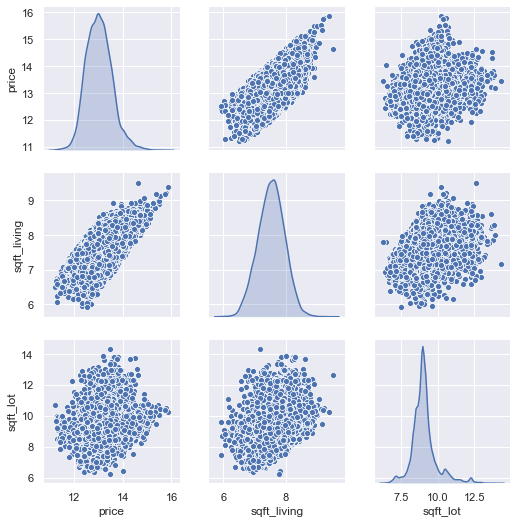

In [965]:
plotFeatures=['price','sqft_living','sqft_lot']
sns.pairplot(data[plotFeatures],diag_kind='kde')

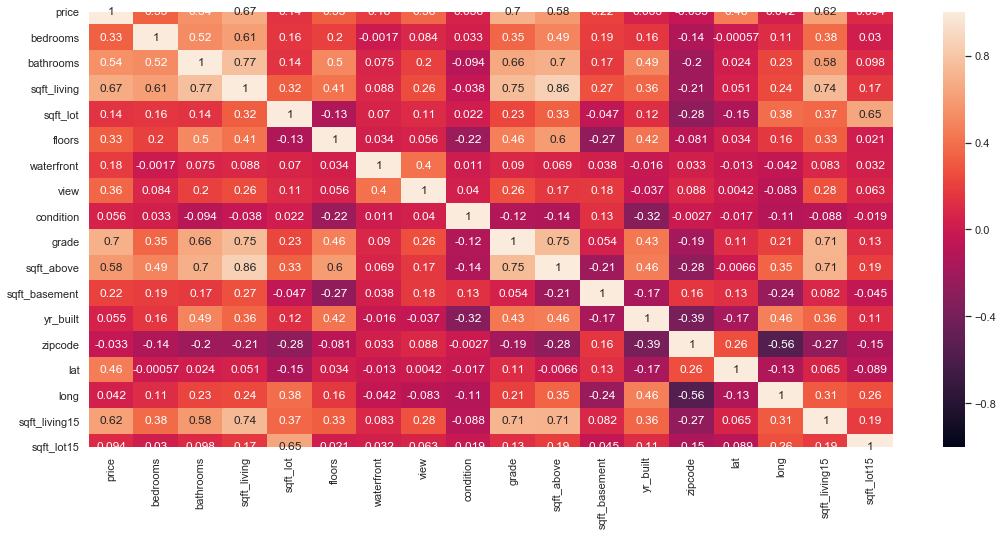

In [966]:
fig = plt.figure(figsize=(18,8))
sns.heatmap(data.corr(),annot=True,vmax=1,vmin=-1)

We notice that there are many features correlating to a decent degree with the prices. Lets see of these which could lead to duplicating of insights.

For instance **sqft_living** and **sqft_above** correlates amongst them to **0.87** which make the **sqft_above** a redundant feature.

we could hypothetically have a **threshold of 0.75** for correlation amongst features to consider them being redundant.

>    - **sqft_living**
>        - bathrooms - 0.76
>        - grade - 0.77
>        - sqft_above - 0.87
>        - sqft_living15 - 0.75

Also we could see some features are very close to **0** in correlating with price, like
>    - zipcode - -0.047
>    - long - 0.015
>    - sqft_lot - 0.081 (also a redundant feature)

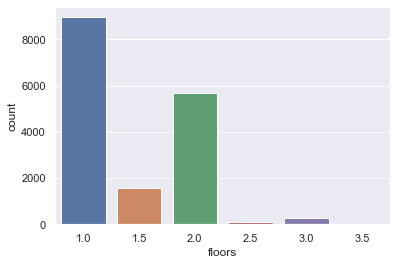

In [967]:
sns.countplot('floors',data=data)

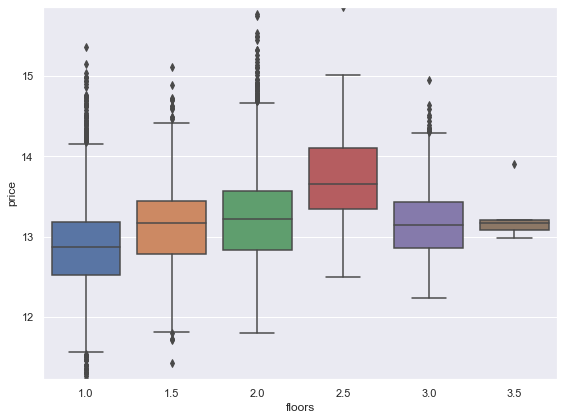

In [968]:
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='floors', y="price", data=data)
fig.axis(ymin=data.price.min(), ymax=data.price.max());
plt.tight_layout()

How can number of floors be a decimal value? i have no clue how, but lets leave it at that. 

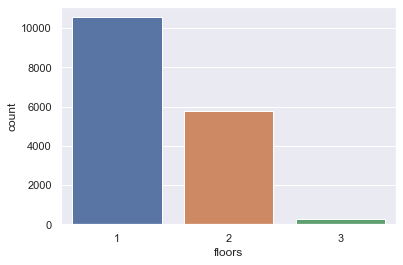

In [969]:
data['floors'] = data['floors'].astype(np.uint8)
sns.countplot('floors',data=data)

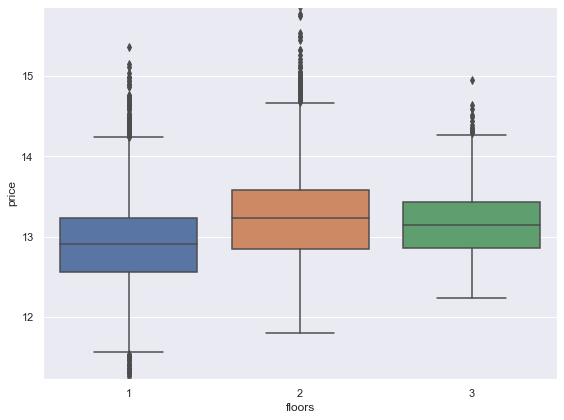

In [970]:
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='floors', y="price", data=data)
fig.axis(ymin=data.price.min(), ymax=data.price.max());
plt.tight_layout()

The houses with 2 floors seems to edge out over other options

We notice a there are many features that have a strong correlation with price. I am not 100% sure at this stage if I have seen everything that I wanted to see. But for instance the **condition** feature seems to have a low correlation, am not sure if its right. Lets do a catplot to check how the condition affects the pricing

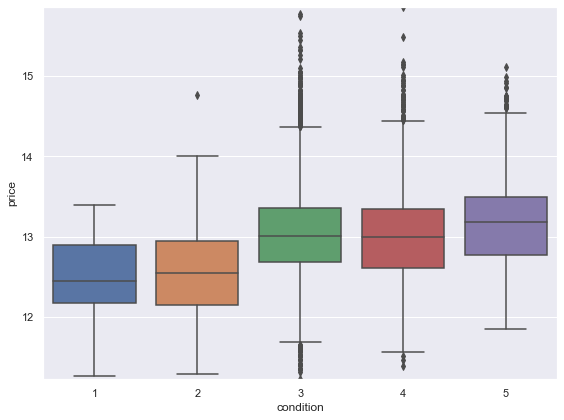

In [971]:
# var = 'OverallQual'
# data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='condition', y="price", data=data)
fig.axis(ymin=data.price.min(), ymax=data.price.max());
plt.tight_layout()


Notice that the conditions does have an impact on the price range, but its just that the outliers skew the correlation. Hence we see a correlation value close to 0. Later we can try a robust scaler and revisit this feature to see if it helped us any better.

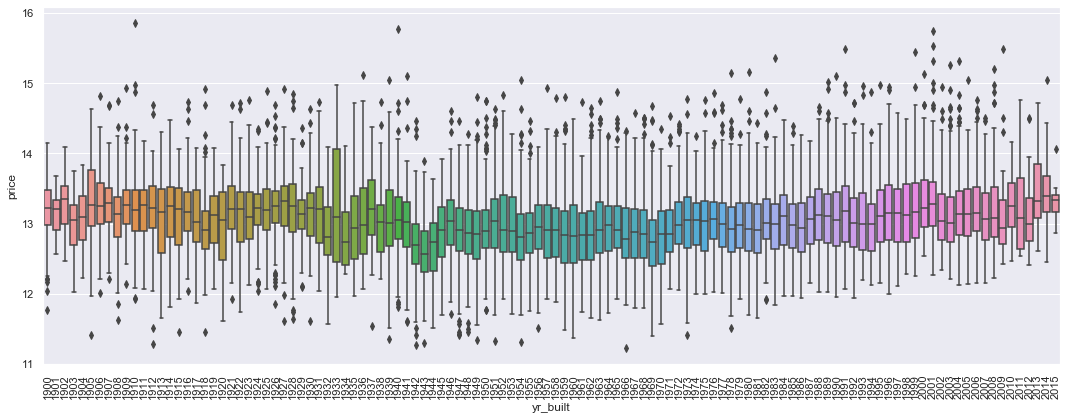

In [972]:
fig= plt.figure(figsize=(15,6))
sns.boxplot('yr_built','price',data=data)
# fig.axis(ymin=data.price.min(), ymax=data.price.max());
plt.xticks(rotation=90)
plt.tight_layout()

I do not visually see any pattern for year built vs price, though the relatively newer house sold more than the ancient ones. Perhaps people wanted to keep a legacy. Also one of the older houses was sold to the highest price recorded, reiterating an additional legacy of sort value to the house.(might have been a country resort/palace..just a thought)

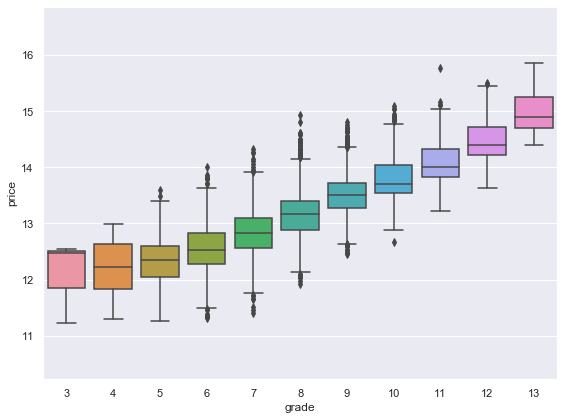

In [974]:
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='grade', y="price", data=data)
fig.axis(ymin=data.price.min()-1, ymax=data.price.max()+1);
plt.tight_layout()

This shows a clear indication of grade being a strong correlator. Also the outliers also seem to follow the trend

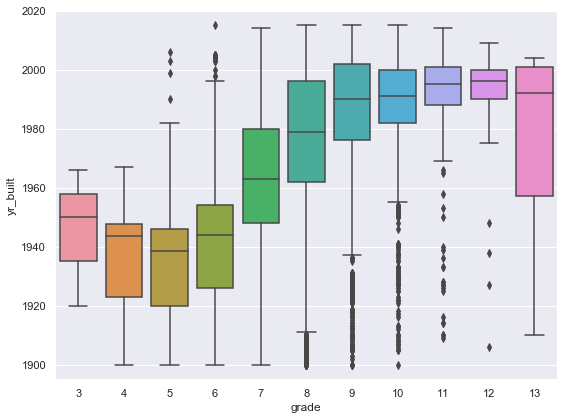

In [977]:
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='grade', y="yr_built", data=data)
fig.axis(ymin=data.yr_built.min()-5, ymax=data.yr_built.max()+5);
plt.tight_layout()

Also the grade seems to be higher for more recently built houses. Except for grade 13 where we a see a minimum value in 1915ish, it also happens to be the highly priced house. Definitely a house with legacy and possibly aristrocratic touch.

In [979]:
data['lat_band'] = pd.qcut(data['lat'],q=10,precision=0)

In [984]:
data.lat_band.value_counts()

(47.54, 47.57]    1668
(47.15, 47.35]    1665
(47.43, 47.49]    1664
(47.66, 47.69]    1663
(47.62, 47.66]    1662
(47.69, 47.73]    1661
(47.35, 47.43]    1660
(47.73, 47.78]    1657
(47.57, 47.62]    1657
(47.49, 47.54]    1656
Name: lat_band, dtype: int64

In [994]:
data['price_band'] = pd.qcut(data['price'],q=10,precision=0)

In [995]:
pd.crosstab(data.lat_band,data.price_band,margins=True).style.background_gradient(cmap='summer_r')

price_band,"(11.1, 12.4]","(12.4, 12.6]","(12.6, 12.7]","(12.7, 12.9]","(12.9, 13.0]","(13.0, 13.1]","(13.1, 13.3]","(13.3, 13.5]","(13.5, 13.7]","(13.7, 15.9]",All
lat_band,,,,,,,,,,,
"(47.15, 47.35]",560,457,271,158,69,56,47,26,14,7,1665
"(47.35, 47.43]",365,441,319,227,104,75,52,36,29,12,1660
"(47.43, 47.49]",325,298,303,255,144,113,95,61,44,26,1664
"(47.49, 47.54]",291,239,224,213,188,127,118,75,84,97,1656
"(47.54, 47.57]",40,67,117,150,171,173,217,209,240,284,1668
"(47.57, 47.62]",6,19,31,75,124,178,227,317,333,347,1657
"(47.62, 47.66]",8,5,16,41,81,141,207,282,361,520,1662
"(47.66, 47.69]",3,9,18,53,164,259,333,337,296,191,1663
"(47.69, 47.73]",25,54,125,215,315,270,195,163,195,104,1661


This does  paint a clear picture but as far as we know the latitude plays a huge role. The lower and higher lat values associate with lower value transactions while mid level latitude has the most high value transactions. May use this to divide into region in future. My guess is the lower and higher may form the outskirts of the county.

In [996]:
pd.crosstab([data.lat_band,data.grade],data.price_band,margins=True).style.background_gradient(cmap='summer_r')

#### One Hot Encoding

In [997]:
ohFeatures=['grade','floors','view']
data = pd.get_dummies(data,columns=ohFeatures,drop_first=True)

### Model Preparation

In [998]:
from sklearn.model_selection import train_test_split,cross_val_score
fDrop = ['price','long','sqft_lot15','lat_band','price_band'] #'condition','long','sqft_lot15','zipcode'
X = data.drop(fDrop,axis=1)

y = data['price']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.33,random_state = 21)

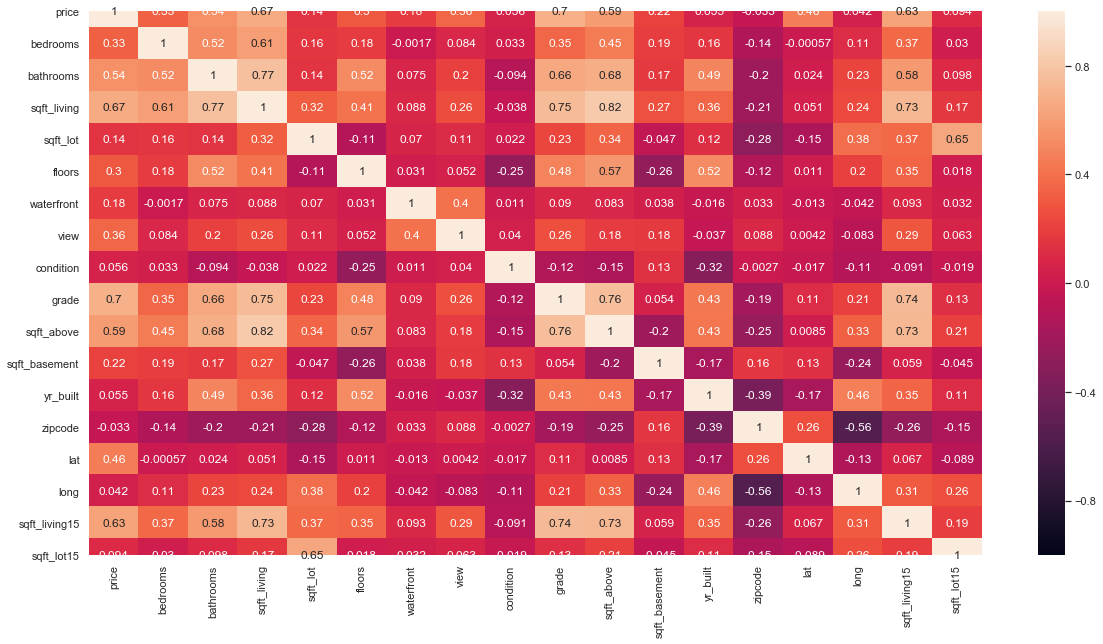

In [999]:
fig = plt.figure(figsize=(20,10))
sns.heatmap(noOutlier.corr(),annot=True,vmax=1,vmin=-1)

### Linear Regression

In [917]:
from sklearn.linear_model import LinearRegression

linFit = LinearRegression()
linFit.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### Metrics Evaluation

In [918]:
y_pred_train = linFit.predict(X_train)
y_pred_test = linFit.predict(X_test)

from sklearn.metrics import mean_squared_error,r2_score

print("MSE: ")
print("Training accuracy: ",mean_squared_error(y_train,y_pred_train))
print("Testing accuracy: ",mean_squared_error(y_test,y_pred_test))

print("RMSE: ")
print("Training accuracy: ",np.sqrt(mean_squared_error(y_train,y_pred_train)))
print("Testing accuracy: ",np.sqrt(mean_squared_error(y_test,y_pred_test)))

print('r2 score: ',r2_score(y_test,y_pred_test))

MSE: 
Training accuracy:  0.0633342652491731
Testing accuracy:  0.06286363419391042
RMSE: 
Training accuracy:  0.25166299936457304
Testing accuracy:  0.2507262136153905
r2 score:  0.7783963010397441


In [919]:
accuracy = linFit.score(X_test, y_test)
"Accuracy: {}%".format(int(round(accuracy * 100)))

'Accuracy: 78%'

### Gradient Boosting *

In [935]:
def get_score(prediction, lables):    
    print('R2: {}'.format(r2_score(prediction, lables)))
    print('RMSE: {}'.format(np.sqrt(mean_squared_error(prediction, lables))))



def train_test(estimator, x_trn, x_tst, y_trn, y_tst):
    prediction_train = estimator.predict(x_trn)
    # Printing estimator
    print(estimator)
    # Printing train scores
    get_score(prediction_train, y_trn)
    prediction_test = estimator.predict(x_tst)
    # Printing test scores
    print("Test")
    get_score(prediction_test, y_tst)



In [936]:
from sklearn import ensemble

GBest = ensemble.GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05, max_depth=3, max_features='sqrt',
                                               min_samples_leaf=15, min_samples_split=10, loss='huber').fit(X_train, y_train)
train_test(GBest, X_train, X_test, y_train, y_test)


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.05, loss='huber', max_depth=3,
                          max_features='sqrt', max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=15, min_samples_split=10,
                          min_weight_fraction_leaf=0.0, n_estimators=3000,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)
R2: 0.915903339154309
RMSE: 0.14425832457370696
Test
R2: 0.8778104952179075
RMSE: 0.17437232692339222


### Test Sequence - DPhi


In [924]:
test_new = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/kc_house_data/kc_house_new_test_data.csv')

In [926]:
test_new.isnull().sum()

bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [ ]:
test_new['sqft_lot'] = np.log(test_new['sqft_lot'])
test_new['sqft_living'] = np.log(test_new['sqft_living'])
test_new['sqft_above'] = np.log(test_new['sqft_above'])

ohFeatures=['grade','floors','view']
test_new = pd.get_dummies(test_new,columns=ohFeatures,drop_first=True)

fDrop = ['price','long','sqft_lot15'] #'condition','long','sqft_lot15','zipcode'
X = test_new.drop(fDrop,axis=1)

In [928]:
price_test = linFit.predict(X)

In [934]:
res = pd.DataFrame(np.exp(price_test))

res.to_csv("prediction_result_linreg.csv")

### Summary

Thus have built a model that can be used to predict the house pricing. Also used ensembling for the first time. Though i completely reffered online, i would like to keep using it in future to learn more about it